# Linear Discriminant Analysis
Project dataset into a new space with less dimensions/features with maximizing class-separation
<img src="pics/lda.pic1.png" width="700">
<img src="pics/lda.pic2.png" width="700">
<img src="pics/lda.pic3.png" width="700">
<img src="pics/lda.pic4.png" width="700">
## Concrete example
https://sebastianraschka.com/Articles/2014_python_lda.html \
https://people.revoledu.com/kardi/tutorial/LDA/Numerical%20Example.html

In [58]:
 import numpy as np
    
class LDA:
    def __init__(self, K):
        self.K = K
        self.discriminants = None

    def fit(self, X, y):
        n_feats = X.shape[1]
        classes = np.unique(y)
        # sum of in-class matrix
        SW = np.zeros((n_feats,n_feats))
        # cross-class matrix
        SB = np.zeros((n_feats,n_feats))
        
        # calculate SB, SW
        global_mean = np.mean(X, axis=0)        
        for cls in classes:
            cls_X = X[y==cls]
            SW += len(cls_X)*np.cov(cls_X.T)
            
            cls_mean = np.mean(cls_X, axis=0)
            _ = (cls_mean-global_mean).reshape(1, n_feats)
            SB += len(cls_X)*np.dot(_.T, _)

        A = np.dot(np.linalg.inv(SW), SB)
        eigenvalues, eigenvectors = np.linalg.eig(A) 
        eigenvectors = eigenvectors.T # turn vector into array(row) for index short
        
        sorted_idxs = np.argsort(abs(eigenvalues))[::-1] # [::-1] to revert the array and get desc order
        eigenvalues = eigenvalues[sorted_idxs]
        eigenvectors = eigenvectors[sorted_idxs]    
        
        self.discriminants = eigenvectors[:self.K].T # turn array vectors into column vectors

    def transform(self, X):

        LDA_X = np.dot(X, self.discriminants)
        return LDA_X

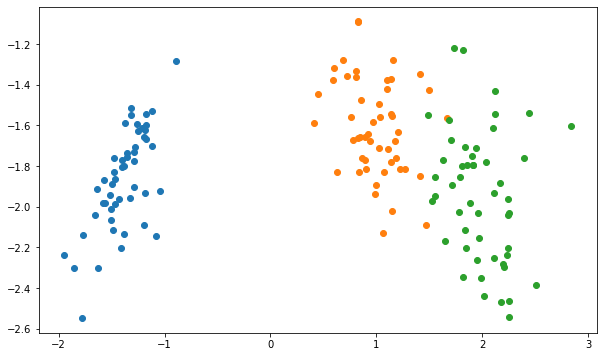

In [59]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

dataset = datasets.load_iris()
X = dataset.data
y = dataset.target

model = LDA(K=2)
model.fit(X, y)
LDA_X = model.transform(X)

fig, ax = plt.subplots(figsize=(10,6))
for cls in np.unique(y):
    points = LDA_X[y==cls].T
    ax.scatter(*points)

plt.show()